In [1]:
#IMPORTS

%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

from utilities import ReadData, X_y

In [2]:
data_file = 'diabetic_data_8_7_100_500_a.csv'
data = ReadData(data_file)

# Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

data = ReadData(data_file)
X,y = X_y(data)

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3)

LR = LogisticRegression()
LR.fit(X_train,y_train)

test_score = LR.score(X_test,y_test)
print("Performance of the classifier on the test set: ",test_score)

scores = cross_val_score(LR, X_train,y_train, cv=5)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Performance of the classifier on the test set:  0.913590244367
[ 0.90833929  0.90863618  0.90832993  0.90894243  0.90822785]
Accuracy: 0.91 (+/- 0.00)


No informations between interactions though ....

# Random Forest Classifier

In [4]:
def Feature_Importance(classifier,names,end_point):
    importances = classifier.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(end_point):
        print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

In [5]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier


RF = RandomForestClassifier()

data = ReadData(data_file)
X,y = X_y(data)
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3)

RF.fit(X_train, y_train)
test_score = RF.score(X_test,y_test)
print("Performance of the classifier on the test set: ",test_score)
scores = cross_val_score(RF, X_train,y_train, cv=5)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print()

names = data.drop('readmitted',axis=1).columns

RF.fit(X_train, y_train)
Feature_Importance(RF,names,20)


Performance of the classifier on the test set:  0.910493974182
[ 0.90905379  0.90822785  0.90822785  0.90924867  0.90914659]
Accuracy: 0.91 (+/- 0.00)

Feature ranking:
1. num_lab_procedures (0.086280)
2. num_medications (0.075905)
3. time_in_hospital (0.056317)
4. num_procedures (0.040187)
5. number_diagnoses (0.038167)
6. admission_type_id (0.028278)
7. medications_hash_2 (0.023760)
8. number_inpatient (0.022331)
9. medications_hash_3 (0.019922)
10. diag_3_Other (0.017286)
11. number_outpatient (0.016055)
12. diag_2_Circulatory (0.015474)
13. diag_3_Circulatory (0.015376)
14. medications_hash_7 (0.015268)
15. medical_speciality_Unknown (0.015243)
16. diag_2_Other (0.014411)
17. medications_hash_6 (0.014359)
18. gender_Male (0.014342)
19. gender_Female (0.014321)
20. number_emergency (0.013883)


In [6]:
def scan_max_features(clf,file):
    
    param_range = np.arange(1, 31, 1)
    scores = []
    
    data = ReadData(file)
    X,y = X_y(data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    for n in range(30):
        #print(n)
        score = []
        for p in param_range:
            correlations = []
            clf.max_features=p
            clf.random_state=21+n
            clf.fit(X_train,y_train)
            score.append(clf.score(X_test,y_test))
          
        scores.append(score)   
        plt.plot(param_range, score, c='b', alpha=0.02)
    
    plt.plot(param_range, np.array(scores).mean(axis=0), c='b', lw=4) 
    plt.xlabel('max_features')
    plt.ylabel('Classifier Score')

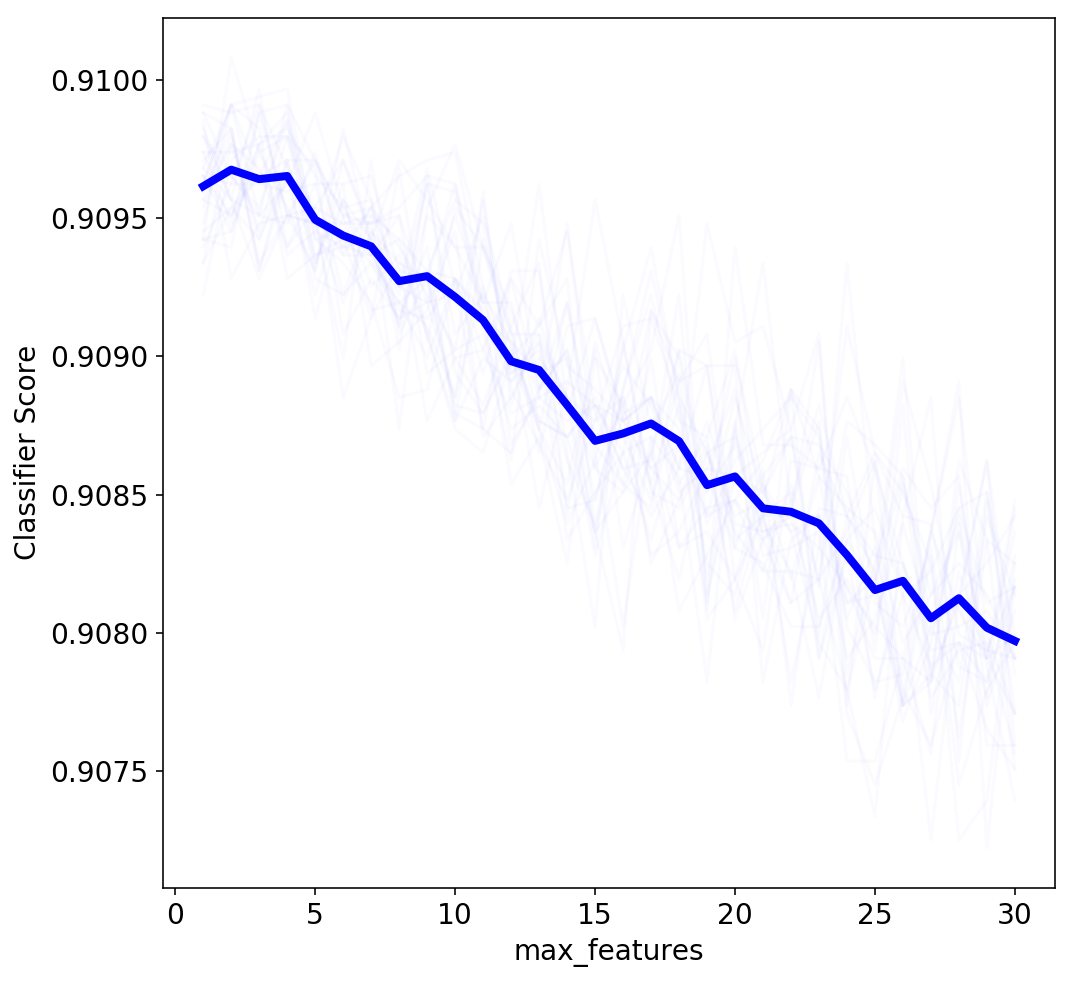

In [7]:
scan_max_features(RF,data_file)

# Extra Trees Classifier

In [8]:
ET = ExtraTreesClassifier()

data = ReadData(data_file)
X,y = X_y(data)
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3)

ET.fit(X_train, y_train)
test_score = RF.score(X_test,y_test)
print("Performance of the classifier on the test set: ",test_score)
scores = cross_val_score(ET, X_train,y_train, cv=5)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print()

names = data.drop('readmitted',axis=1).columns

ET.fit(X_train, y_train)
Feature_Importance(ET,names,20)

Performance of the classifier on the test set:  0.945505644739
[ 0.90946208  0.90843201  0.90761535  0.90863618  0.90843201]
Accuracy: 0.91 (+/- 0.00)

Feature ranking:
1. num_medications (0.055172)
2. num_lab_procedures (0.054928)
3. time_in_hospital (0.051844)
4. number_diagnoses (0.041136)
5. num_procedures (0.040532)
6. admission_type_id (0.027525)
7. number_inpatient (0.027279)
8. medications_hash_2 (0.023489)
9. medications_hash_3 (0.021750)
10. number_outpatient (0.021136)
11. medications_hash_7 (0.018783)
12. diag_3_Circulatory (0.017868)
13. diag_2_Circulatory (0.017593)
14. gender_Male (0.017315)
15. medical_speciality_Unknown (0.017283)
16. gender_Female (0.017147)
17. diag_2_Other (0.016927)
18. diag_3_Other (0.016305)
19. medications_hash_6 (0.015878)
20. number_emergency (0.015766)


# Gradient Boosting Classifier

In [9]:
GB = GradientBoostingClassifier()

data = ReadData(data_file)
X,y = X_y(data)
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3)

GB.fit(X_train, y_train)
test_score = GB.score(X_test,y_test)
print("Performance of the classifier on the test set: ",test_score)
scores = cross_val_score(ET, X_train,y_train, cv=5)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print()

names = data.drop('readmitted',axis=1).columns

GB.fit(X_train, y_train)
Feature_Importance(ET,names,20)

Performance of the classifier on the test set:  0.913494974515
[ 0.90527713  0.90761535  0.90628828  0.90496121  0.9055737 ]
Accuracy: 0.91 (+/- 0.00)

Feature ranking:
1. num_medications (0.055172)
2. num_lab_procedures (0.054928)
3. time_in_hospital (0.051844)
4. number_diagnoses (0.041136)
5. num_procedures (0.040532)
6. admission_type_id (0.027525)
7. number_inpatient (0.027279)
8. medications_hash_2 (0.023489)
9. medications_hash_3 (0.021750)
10. number_outpatient (0.021136)
11. medications_hash_7 (0.018783)
12. diag_3_Circulatory (0.017868)
13. diag_2_Circulatory (0.017593)
14. gender_Male (0.017315)
15. medical_speciality_Unknown (0.017283)
16. gender_Female (0.017147)
17. diag_2_Other (0.016927)
18. diag_3_Other (0.016305)
19. medications_hash_6 (0.015878)
20. number_emergency (0.015766)


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, norm, uniform

data = ReadData(data_file)
X,y = X_y(data)

GB = GradientBoostingClassifier(n_estimators=3000)

param_grid = {'learning_rate': uniform(0.01,0.1),
              'max_depth': randint(2,6),
              'max_features': uniform(0.01,0.1),
              'min_samples_leaf': randint(2,12)}
grid_search = RandomizedSearchCV(GB,param_grid,cv=5, n_iter=12).fit(X,y)
print("Best parameters: ",grid_search.best_params_)



Best parameters:  {'learning_rate': 0.019138003636786052, 'max_depth': 2, 'max_features': 0.02094733298370011, 'min_samples_leaf': 10}


In [17]:
# test scores for all points that were evaluated
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

0.877 (+/-0.042) for {'learning_rate': 0.092322802150455643, 'max_depth': 5, 'max_features': 0.032408508269667353, 'min_samples_leaf': 5}
0.887 (+/-0.047) for {'learning_rate': 0.046781533796404991, 'max_depth': 2, 'max_features': 0.062626446226154403, 'min_samples_leaf': 11}
0.885 (+/-0.040) for {'learning_rate': 0.096993450421875238, 'max_depth': 4, 'max_features': 0.01387045297845119, 'min_samples_leaf': 3}
0.885 (+/-0.050) for {'learning_rate': 0.045616435415887717, 'max_depth': 2, 'max_features': 0.052520785480274119, 'min_samples_leaf': 4}
0.886 (+/-0.048) for {'learning_rate': 0.016481346749318407, 'max_depth': 2, 'max_features': 0.044467567214131837, 'min_samples_leaf': 3}
0.885 (+/-0.047) for {'learning_rate': 0.066000130626849299, 'max_depth': 2, 'max_features': 0.096157007059229457, 'min_samples_leaf': 3}
0.886 (+/-0.044) for {'learning_rate': 0.086524338177570687, 'max_depth': 4, 'max_features': 0.017993572182948218, 'min_samples_leaf': 9}
0.891 (+/-0.039) for {'learning_ra

In [18]:
data = ReadData(data_file)
X,y = X_y(data)

GB = GradientBoostingClassifier(max_depth=2,min_samples_leaf=10,max_features=0.02)

param_grid = {'learning_rate': uniform(0.01,0.1),
              'n_estimators': randint(100,1000)}
grid_search = RandomizedSearchCV(GB,param_grid,cv=5, n_iter=10).fit(X,y)
print("Best parameters: ",grid_search.best_params_)

Best parameters:  {'learning_rate': 0.010369293599727072, 'n_estimators': 512}


In [19]:
# test scores for all points that were evaluated
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

0.910 (+/-0.002) for {'learning_rate': 0.082110491964963561, 'n_estimators': 743}
0.908 (+/-0.004) for {'learning_rate': 0.067779373812838065, 'n_estimators': 924}
0.910 (+/-0.000) for {'learning_rate': 0.010369293599727072, 'n_estimators': 512}
0.910 (+/-0.000) for {'learning_rate': 0.072099554459289408, 'n_estimators': 170}
0.910 (+/-0.000) for {'learning_rate': 0.050793797796065437, 'n_estimators': 654}
0.910 (+/-0.000) for {'learning_rate': 0.083248873306705939, 'n_estimators': 103}
0.899 (+/-0.023) for {'learning_rate': 0.091994446977873345, 'n_estimators': 880}
0.910 (+/-0.000) for {'learning_rate': 0.1053948352592069, 'n_estimators': 155}
0.910 (+/-0.000) for {'learning_rate': 0.039171008130698938, 'n_estimators': 543}
0.910 (+/-0.000) for {'learning_rate': 0.035091862250966728, 'n_estimators': 661}


# Adaboost Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier()
bdt = AdaBoostClassifier(dt, algorithm='SAMME', n_estimators=100, learning_rate=0.1)

data = ReadData(data_file)
X,y = X_y(data)
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3)

bdt.fit(X_train, y_train)
test_score = bdt.score(X_test,y_test)
print("Performance of the classifier on the test set: ",test_score)
scores = cross_val_score(bdt, X_train,y_train, cv=5)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print()

names = data.drop('readmitted',axis=1).columns

bdt.fit(X_train, y_train)
Feature_Importance(bdt,names,20)

Performance of the classifier on the test set:  0.827799742771
[ 0.82698785  0.83493263  0.83187015  0.83299306  0.83197223]
Accuracy: 0.83 (+/- 0.00)

Feature ranking:
1. num_lab_procedures (0.114183)
2. num_medications (0.093283)
3. time_in_hospital (0.059543)
4. number_diagnoses (0.043671)
5. num_procedures (0.037863)
6. medications_hash_2 (0.029013)
7. admission_type_id (0.023464)
8. medications_hash_3 (0.022888)
9. number_outpatient (0.018702)
10. medications_hash_6 (0.017144)
11. medications_hash_7 (0.015819)
12. race_Caucasian (0.014709)
13. gender_Female (0.014345)
14. number_inpatient (0.014175)
15. diag_2_Circulatory (0.014088)
16. medical_speciality_Unknown (0.014053)
17. diag_3_Circulatory (0.013809)
18. gender_Male (0.013661)
19. number_emergency (0.013445)
20. admission_source_id_7 (0.012327)


In [13]:
from sklearn.decomposition import PCA

data = ReadData(data_file)
X,y = X_y(data)
pca = PCA(20)
pca.fit(X)

X = pca.transform(X)

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3)

bdt.fit(X_train, y_train)
test_score = bdt.score(X_test,y_test)
print("Performance of the classifier on the test set: ",test_score)
scores = cross_val_score(bdt, X_train,y_train, cv=5)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print()

names = data.drop('readmitted',axis=1).columns

bdt.fit(X_train, y_train)
Feature_Importance(bdt,names,20)

Performance of the classifier on the test set:  0.824989282142
[ 0.82770236  0.83238056  0.82799102  0.82441813  0.82462229]
Accuracy: 0.83 (+/- 0.00)

Feature ranking:
1. race_Other (0.057700)
2. race_AfricanAmerican (0.057479)
3. race_Caucasian (0.055919)
4. admission_type_id (0.054582)
5. num_medications (0.053981)
6. gender_Unknown/Invalid (0.053441)
7. time_in_hospital (0.051731)
8. gender_Male (0.050624)
9. num_lab_procedures (0.050408)
10. race_Hispanic (0.050269)
11. number_outpatient (0.050112)
12. gender_Female (0.049990)
13. A1Cresult_>7 (0.049777)
14. number_diagnoses (0.047757)
15. A1Cresult_>8 (0.047340)
16. number_emergency (0.046758)
17. race_nan (0.045248)
18. num_procedures (0.045135)
19. race_Asian (0.040945)
20. number_inpatient (0.040804)


# HbA1c on readmission probability

In [150]:
LR = LogisticRegression()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier(n_estimators=500,learning_rate=0.02,max_depth=2,min_samples_leaf=10,max_features=0.02)

data = ReadData('diabetic_data_encod_7_9_400_100')

for i in data.columns:
    print(i)

Unnamed: 0
admission_type_id
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
number_diagnoses
readmitted
diag_1_Circulatory
diag_1_Diabetes
diag_1_Digestive
diag_1_Genitourinary
diag_1_Injury
diag_1_Musculoskeletal
diag_1_Neoplasms
diag_1_Other
diag_1_Respiratory
diag_2_Circulatory
diag_2_Diabetes
diag_2_Digestive
diag_2_Genitourinary
diag_2_Injury
diag_2_Musculoskeletal
diag_2_Neoplasms
diag_2_Other
diag_2_Respiratory
diag_3_Circulatory
diag_3_Diabetes
diag_3_Digestive
diag_3_Genitourinary
diag_3_Injury
diag_3_Musculoskeletal
diag_3_Neoplasms
diag_3_Other
diag_3_Respiratory
race_AfricanAmerican
race_Asian
race_Caucasian
race_Hispanic
race_Other
race_nan
gender_Female
gender_Male
gender_Unknown/Invalid
age_[0-10)
age_[10-20)
age_[20-30)
age_[30-40)
age_[40-50)
age_[50-60)
age_[60-70)
age_[70-80)
age_[80-90)
age_[90-100)
A1Cresult_>7
A1Cresult_>8
A1Cresult_None
A1Cresult_Norm
max_glu_serum_>200
max_glu_serum_>300
max

In [151]:
data_1 = data[data["A1Cresult_None"] == 1]
X_1,y_1 = X_y(data_1)
data_2 = data[data["A1Cresult_Norm"] == 1]
X_2,y_2 = X_y(data_2)
data_3 = data[(data["A1Cresult_>8"] == 1) & (data["change_Ch"] != 1)]
X_3,y_3 = X_y(data_3)
data_4 = data[(data["A1Cresult_>8"] == 1) & (data["change_Ch"] == 1)]
X_4,y_4 = X_y(data_4)

data_list = [data["A1Cresult_None"] == 1,data["A1Cresult_Norm"] == 1,
(data["A1Cresult_>8"] == 1) & (data["change_Ch"] != 1),(data["A1Cresult_>8"] == 1) & (data["change_Ch"] != 1)]

diag = [(data["diag_1_Diabetes"] == 1),(data["diag_1_Respiratory"] == 1),(data["diag_1_Circulatory"] == 1)]

### Diag_1 Diabetes

In [152]:
DATA = ReadData('diabetic_data_encod_7_9_400_100')
data = DATA[(DATA["diag_1_Diabetes"] == 1)]

data_list = [data["A1Cresult_None"] == 1,data["A1Cresult_Norm"] == 1,
(data["A1Cresult_>8"] == 1) & (data["change_Ch"] != 1),(data["A1Cresult_>8"] == 1) & (data["change_Ch"] != 1)]

probs=[]
for dat in data_list:
    prob = []
    for n in range(20):         
        d = data[dat]
        LR = LogisticRegression(random_state=n+20)
        X,y = X_y(d)
        X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5,random_state=n+32)
        LR.fit(X_train,y_train)
        p = LR.predict_proba(X_test)
        prob.append(np.mean(p[:,1]))
    probs.append(np.mean(prob))

print(probs)

Diabete_LR  = probs

[0.10687072639305914, 0.1013141042652785, 0.045348198278441179, 0.045348198278441179]


In [153]:
probsRF=[]
for dat in data_list:
    prob = []
    for n in range(20):
        d = data[dat]
        RF = RandomForestClassifier(random_state=n+12)
        X,y = X_y(d)
        X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5,random_state=n+34)
        RF.fit(X_train,y_train)
        p = RF.predict_proba(X_test)
        prob.append(np.mean(p[:,1]))
    probsRF.append(np.mean(prob))

print(probsRF)

Diabete_RF  = probsRF

[0.10672993492407809, 0.095735294117647057, 0.049482758620689647, 0.049482758620689647]


In [154]:
probsGB=[]
for dat in data_list:
    prob = []
    for n in range(20):
        d = data[dat]
        GB = GradientBoostingClassifier(n_estimators=500,learning_rate=0.02,max_depth=2,
                                min_samples_leaf=10,max_features=0.02,random_state=n+90)
        X,y = X_y(d)
        X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5,random_state=n+12)
        GB.fit(X_train,y_train)
        p = GB.predict_proba(X_test)
        prob.append(np.mean(p[:,1]))
    probsGB.append(np.mean(prob))

print(probsGB)

Diabete_GB = probsGB

[0.098951518915601361, 0.10108244924111223, 0.047077749823481417, 0.047077749823481417]


### Diag_1 Circulatory

In [155]:
DATA = ReadData('diabetic_data_encod_7_9_400_100')
data = DATA[(DATA["diag_1_Circulatory"] == 1)]

data_list = [data["A1Cresult_None"] == 1,data["A1Cresult_Norm"] == 1,
(data["A1Cresult_>8"] == 1) & (data["change_Ch"] != 1),(data["A1Cresult_>8"] == 1) & (data["change_Ch"] != 1)]

probs=[]
for dat in data_list:
    prob = []
    for n in range(20):         
        d = data[dat]
        LR = LogisticRegression(random_state=n+20)
        X,y = X_y(d)
        X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5,random_state=n+32)
        LR.fit(X_train,y_train)
        p = LR.predict_proba(X_test)
        prob.append(np.mean(p[:,1]))
    probs.append(np.mean(prob))

print(probs)

Circulatory_LR  = probs

[0.099128862136093329, 0.111993106815008, 0.10270020460021534, 0.10270020460021534]


In [156]:
probsRF=[]
for dat in data_list:
    prob = []
    for n in range(20):
        d = data[dat]
        RF = RandomForestClassifier(random_state=n+12)
        X,y = X_y(d)
        X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5,random_state=n+34)
        RF.fit(X_train,y_train)
        p = RF.predict_proba(X_test)
        prob.append(np.mean(p[:,1]))
    probsRF.append(np.mean(prob))

print(probsRF)

Circulatory_RF  = probsRF

[0.10305327632035133, 0.10706030150753768, 0.10268786127167628, 0.10268786127167628]


In [157]:
probsGB=[]
for dat in data_list:
    prob = []
    for n in range(20):
        d = data[dat]
        GB = GradientBoostingClassifier(n_estimators=500,learning_rate=0.02,max_depth=2,
                                min_samples_leaf=10,max_features=0.02,random_state=n+90)
        X,y = X_y(d)
        X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5,random_state=n+12)
        GB.fit(X_train,y_train)
        p = GB.predict_proba(X_test)
        prob.append(np.mean(p[:,1]))
    probsGB.append(np.mean(prob))

print(probsGB)

Circulatory_GB = probsGB

[0.095837413575232677, 0.097644792191162899, 0.09169698166578831, 0.09169698166578831]


### Diag_1 Respiratory

In [158]:
DATA = ReadData('diabetic_data_encod_7_9_400_100')
data = DATA[(DATA["diag_1_Respiratory"] == 1)]

data_list = [data["A1Cresult_None"] == 1,data["A1Cresult_Norm"] == 1,
(data["A1Cresult_>8"] == 1) & (data["change_Ch"] != 1),(data["A1Cresult_>8"] == 1) & (data["change_Ch"] != 1)]

probs=[]
for dat in data_list:
    prob = []
    for n in range(20):         
        d = data[dat]
        LR = LogisticRegression(random_state=n+20)
        X,y = X_y(d)
        X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5,random_state=n+32)
        LR.fit(X_train,y_train)
        p = LR.predict_proba(X_test)
        prob.append(np.mean(p[:,1]))
    probs.append(np.mean(prob))

print(probs)

Respiratory_LR  = probs

[0.083601252289261213, 0.046020983591190633, 0.059405632992464562, 0.059405632992464562]


In [159]:
probsRF=[]
for dat in data_list:
    prob = []
    for n in range(20):
        d = data[dat]
        RF = RandomForestClassifier(random_state=n+12)
        X,y = X_y(d)
        X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5,random_state=n+34)
        RF.fit(X_train,y_train)
        p = RF.predict_proba(X_test)
        prob.append(np.mean(p[:,1]))
    probsRF.append(np.mean(prob))

print(probsRF)

Respiratory_RF  = probsRF

[0.082877197585935453, 0.048444055944055951, 0.061180555555555557, 0.061180555555555557]


In [160]:
probsGB=[]
for dat in data_list:
    prob = []
    for n in range(20):
        d = data[dat]
        GB = GradientBoostingClassifier(n_estimators=500,learning_rate=0.02,max_depth=2,
                                min_samples_leaf=10,max_features=0.02,random_state=n+90)
        X,y = X_y(d)
        X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5,random_state=n+12)
        GB.fit(X_train,y_train)
        p = GB.predict_proba(X_test)
        prob.append(np.mean(p[:,1]))
    probsGB.append(np.mean(prob))

print(probsGB)

Respiratory_GB = probsGB

[0.077462895224383252, 0.043540111324206876, 0.049623080411777057, 0.049623080411777057]


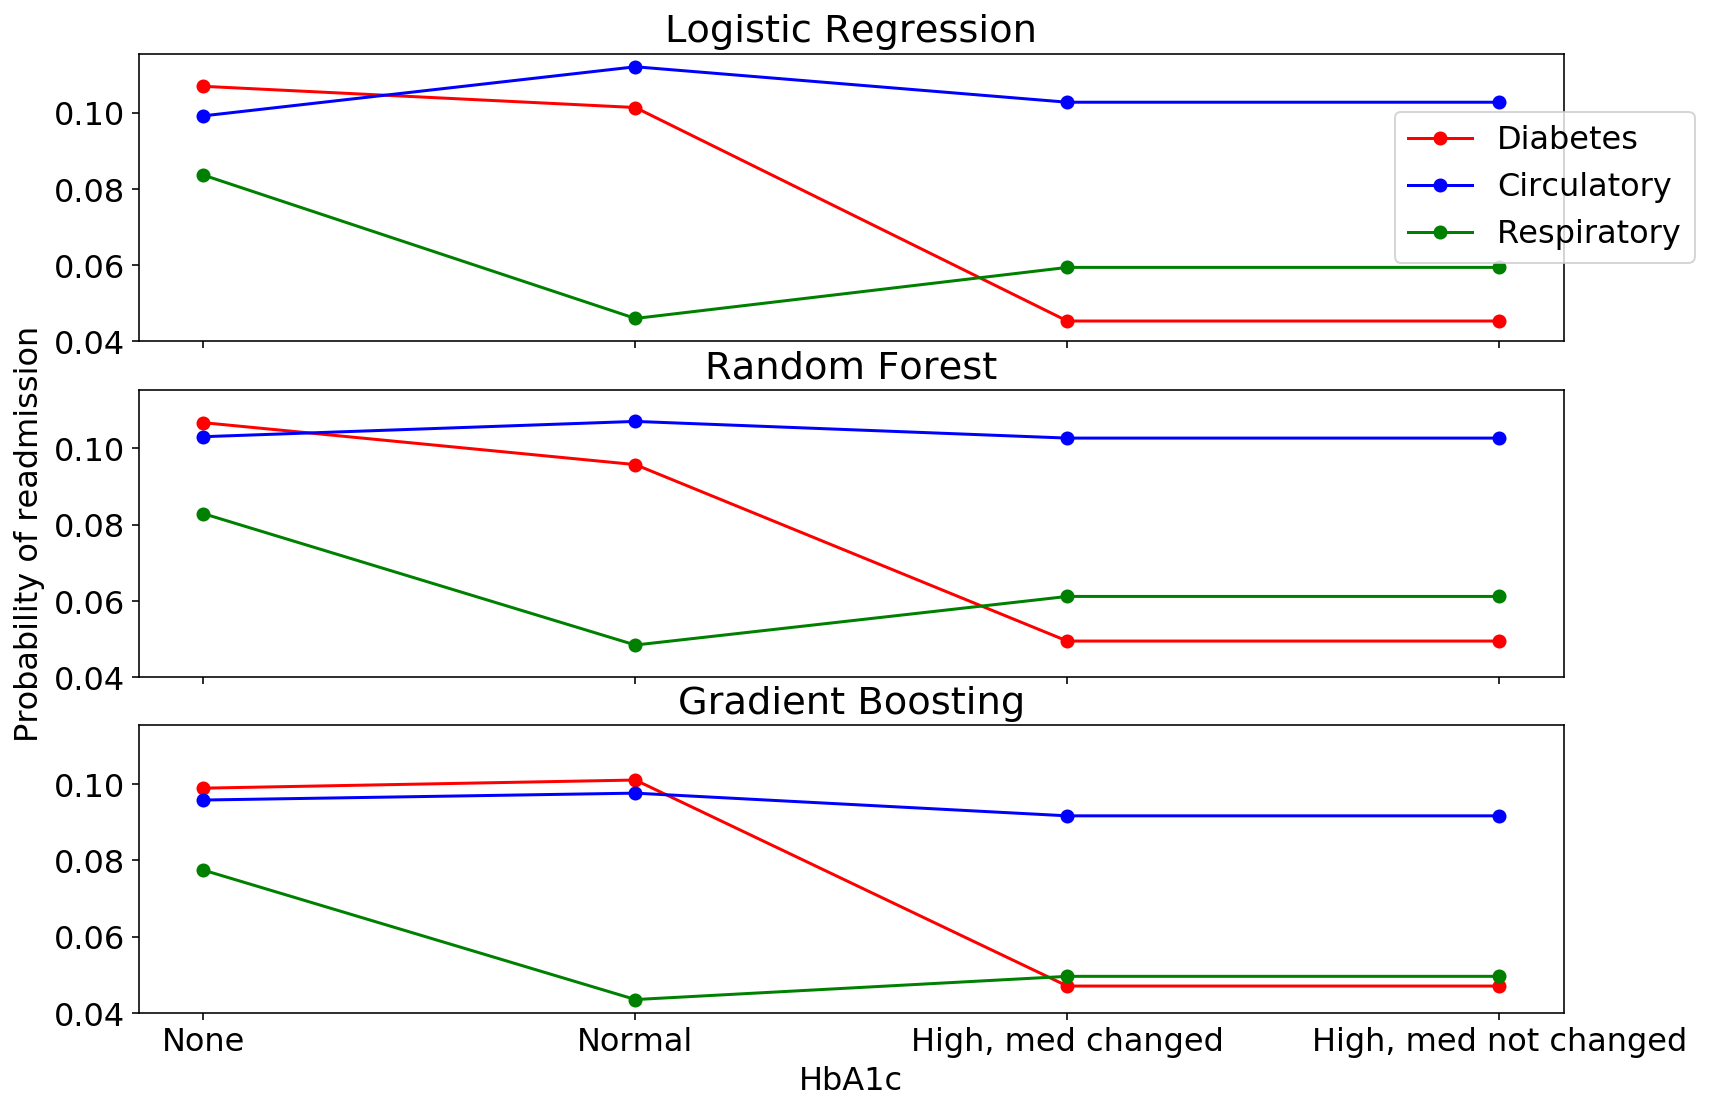

In [177]:
x = np.array([1,2,3,4])
name = ["None","Normal","High, med changed","High, med not changed"]

f, axarr = plt.subplots(3, 1, sharex=True, sharey=True)

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 16

plt.xticks(x, name)


axarr[0].set_title("Logistic Regression")
axarr[0].plot(x,Diabete_LR,'-ro',label="Diabetes")
axarr[0].plot(x,Circulatory_LR,'-bo',label="Circulatory")
axarr[0].plot(x,Respiratory_LR,'-go',label="Respiratory")
plt.xlabel("HbA1c")
plt.tight_layout()
axarr[0].legend(loc='center left', bbox_to_anchor=(0.87, 0.535))

axarr[1].set_title("Random Forest")
axarr[1].plot(x,Diabete_RF,'-ro',label="Diabetes")
axarr[1].plot(x,Circulatory_RF,'-bo',label="Circulatory")
axarr[1].plot(x,Respiratory_RF,'-go',label="Respiratory")
axarr[1].set_ylabel("Probability of readmission")

axarr[2].set_title("Gradient Boosting")
axarr[2].plot(x,Diabete_GB,'-ro',label="Diabetes")
axarr[2].plot(x,Circulatory_GB,'-bo',label="Respiratory")
axarr[2].plot(x,Respiratory_GB,'-go',label="Circulatory")

plt.savefig('prob_A1c.pdf')